In [22]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten


In [3]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [25]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28, 1) y_train shape: (60000,)


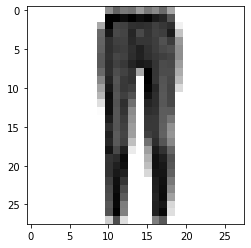

In [35]:
plt.imshow(x_train[9456].reshape([28,28]),cmap=plt.get_cmap('gray_r'))



In [13]:
from tensorflow.keras import backend as tfk

if tfk.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
    
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255  # Normalize the data dimension


In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)  # One hot encoding
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

In [54]:
model = Sequential()
# 1st layer 32 kernels 3x3 size
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 padding='same', #zero padding
                 activation='relu',
                 input_shape=input_shape))
# 2nd Conv layer 64 kernels 3x3 size
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'))
# Maxpooling layer 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Dropout to layers to avoid overfitting
model.add(Dropout(0.3))

# Flattening layer
model.add(Flatten())

# A hidden layer to learn with
model.add(Dense(128, activation='relu'))


model.add(Dropout(0.5))

# Softmax categorization layer
model.add(Dense(10, activation='softmax'))



In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [56]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [57]:
model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 - 81s - loss: 0.4471 - accuracy: 0.8415 - val_loss: 0.2889 - val_accuracy: 0.8953
Epoch 2/10
1875/1875 - 81s - loss: 0.3004 - accuracy: 0.8926 - val_loss: 0.2540 - val_accuracy: 0.9041
Epoch 3/10
1875/1875 - 81s - loss: 0.2573 - accuracy: 0.9050 - val_loss: 0.2351 - val_accuracy: 0.9146
Epoch 4/10
1875/1875 - 81s - loss: 0.2266 - accuracy: 0.9163 - val_loss: 0.2378 - val_accuracy: 0.9134
Epoch 5/10
1875/1875 - 78s - loss: 0.2063 - accuracy: 0.9243 - val_loss: 0.2147 - val_accuracy: 0.9237
Epoch 6/10
1875/1875 - 80s - loss: 0.1861 - accuracy: 0.9308 - val_loss: 0.2146 - val_accuracy: 0.9257
Epoch 7/10
1875/1875 - 80s - loss: 0.1708 - accuracy: 0.9353 - val_loss: 0.2251 - val_accuracy: 0.9223
Epoch 8/10
1875/1875 - 81s - loss: 0.1620 - accuracy: 0.9399 - val_loss: 0.2277 - val_accuracy: 0.9253
Epoch 9/10
1875/1875 - 84s - loss: 0.1502 - accuracy: 0.9432 - val_loss: 0.2154 - val_accuracy: 0.9307
Epoch 10/10
1875/1875 - 84s - loss: 0.1411 - accuracy: 0.9478 - val_loss:

In [58]:
val=model.predict(x_test[400].reshape([1,28,28,1]))

In [59]:
val

array([[9.9974746e-01, 7.8205409e-16, 7.3701552e-09, 1.1340576e-08,
        3.2653315e-13, 3.0804243e-16, 2.5253755e-04, 1.3039281e-20,
        1.1655252e-13, 8.4891923e-21]], dtype=float32)

In [60]:
val.argmax(axis=1)

array([0])

[[2.06190223e-15 5.47071317e-16 3.85378772e-22 1.62963163e-22
  1.31703029e-22 1.00000000e+00 1.35709371e-19 2.97535400e-14
  6.46149692e-13 1.26084242e-13]
 [1.10392494e-03 4.45811270e-15 1.42671539e-07 2.28082001e-07
  7.04913061e-09 2.23730084e-12 9.98895645e-01 2.08893571e-13
  5.57078543e-08 2.75552201e-14]
 [3.82569512e-14 6.29684822e-16 1.15384607e-15 1.72662703e-14
  8.16406618e-16 1.34506872e-09 1.03504004e-13 1.00000000e+00
  3.68917310e-12 6.64083788e-11]
 [1.43298473e-09 5.00766387e-15 1.95286089e-13 4.65187621e-13
  5.68847649e-13 5.24889323e-13 5.06270892e-09 6.50807750e-13
  1.00000000e+00 6.68667986e-12]
 [2.38358053e-13 6.93131031e-18 1.73759543e-14 3.64355966e-15
  1.21087859e-13 1.54018725e-11 1.49802523e-12 5.56822817e-12
  8.13592290e-14 1.00000000e+00]]
Predicted labels are: [5 6 7 8 9]


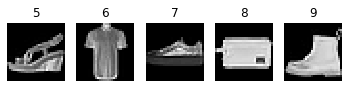

In [61]:

sample_size = 5
indices = random.sample(range(x_test.shape[0] - 1), sample_size)
samp_images = x_test[indices]
samp_labels = y_test[indices]

for i in range(sample_size):
    plt.subplot(1,sample_size,i+1)
    plt.imshow(samp_images[i].reshape(28, 28), cmap='gray')
    plt.title(samp_labels[i])
    plt.axis('off')

prediction = model.predict(samp_images.reshape(sample_size, 28, 28, 1))
print(prediction)
prediction = np.array(prediction)
predicted_label = prediction.argmax(axis=1)
print('Predicted labels are: {}'.format(predicted_label))
